In [1]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

In [2]:
data = yf.download('GC=F', period='5y', interval='1d', auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-02-21,1237.300049,1237.500000,1228.099976,1237.500000,119
2017-02-22,1236.099976,1238.599976,1231.800049,1232.000000,36
2017-02-23,1236.099976,1250.300049,1236.099976,1250.199951,112
2017-02-24,1250.000000,1258.800049,1250.000000,1256.900024,1264
2017-02-27,1254.699951,1263.099976,1250.400024,1257.400024,544


In [3]:
data = data[['Close']].reset_index()
data.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)
data.head()

,ds,y
0,2017-02-21,1237.500000
1,2017-02-22,1232.000000
2,2017-02-23,1250.199951
3,2017-02-24,1256.900024
4,2017-02-27,1257.400024


In [4]:
len_test = int(0.2*len(data))
data_train = data.iloc[:-len_test, :]
data_test = data.iloc[-len_test:, :]

In [5]:
model = Prophet(seasonality_mode='additive')
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [6]:
model.fit(data_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.56958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3353.96     0.0144411       1349.83           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3468.96     0.0111305       1402.18           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3587.65     0.0133281       1009.99           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3621.69   0.000939262       293.837           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3639.43    0.00115103       732.364      0.7314      0.7314      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [7]:
# future = model.make_future_dataframe(periods=len_test)
future = data[['ds']]
forecast = model.predict(future)

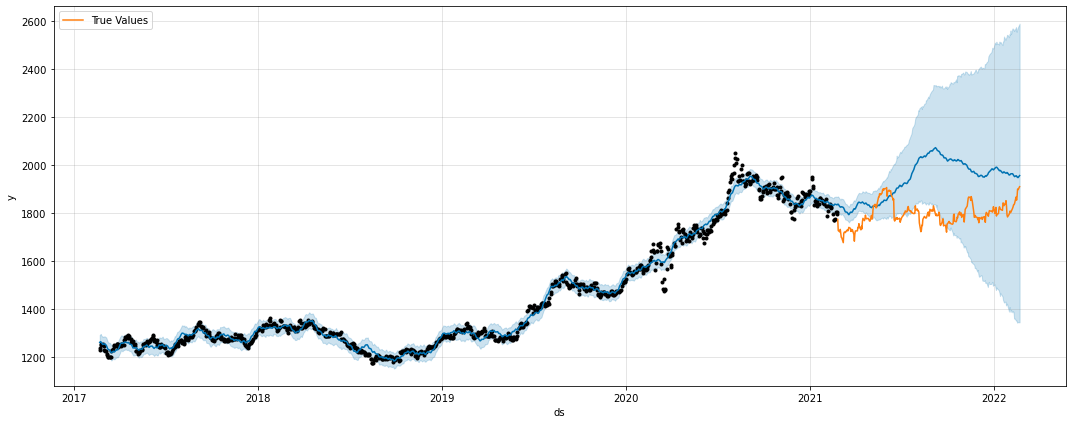

In [8]:
fig, ax = plt.subplots(figsize=(15,6))
model.plot(forecast, ax=ax)
ax.plot(data_test.set_index('ds'), color='tab:orange', label='True Values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

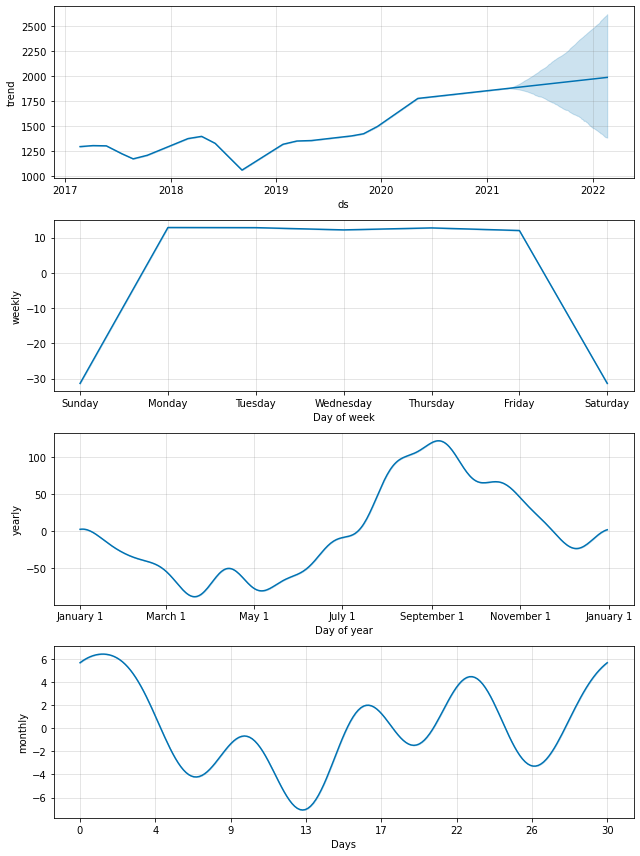

In [9]:
model.plot_components(forecast)
plt.tight_layout()
plt.show()

In [10]:
pred_true = data_test.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], how='left', on='ds')
pred_true.set_index('ds', inplace=True)
pred_true.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2021-02-25,1774.400024,1838.081827,1804.509081,1870.686448
2021-02-26,1728.099976,1837.961708,1807.572470,1869.119905
2021-03-01,1722.500000,1828.264181,1796.897924,1860.126967
2021-03-02,1733.099976,1826.016446,1796.102285,1857.814037
2021-03-03,1715.300049,1825.465763,1793.566980,1857.699974


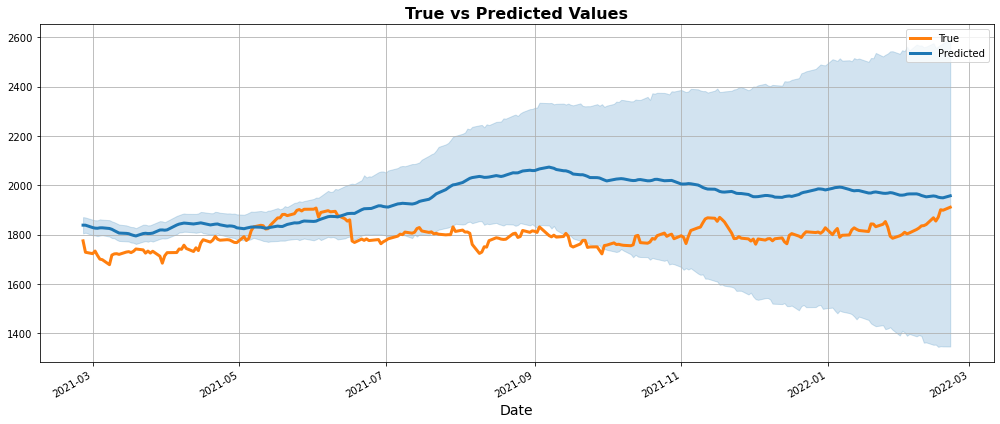

In [11]:
fig, ax = plt.subplots(figsize=(14,6))
pred_true.loc[:, ['y', 'yhat']].plot(ax=ax, color=['tab:orange', 'tab:blue'], linewidth=3)
ax.fill_between(pred_true.index, pred_true.yhat_upper, pred_true.yhat_lower, alpha=0.2, color='tab:blue')
ax.legend(['True', 'Predicted'], frameon=True)
ax.set_xlabel('Date', fontsize=14)
ax.set_title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()